# Project : Analyzing the Trends of COVID-19 with Python


# Project Overview:
*The global outbreak of COVID-19 brought unprecedented challenges to public health, economies, and societies worldwide. As the pandemic unfolded, the need for accurate data and meaningful insights became essential for policy-making, healthcare planning, and public awareness. This project, Analyzing the Trends of COVID-19 with Python, aims to study the spread, impact, and patterns of COVID-19 using real-world datasets and Python’s data analytics and visualization libraries.*

# Project Objective:

*The objective of this project is to analyze and visualize COVID-19 infection and recovery trends using historical data on confirmed cases, deaths, and recoveries from global and Indian datasets. The project aims to:*



*   Aggregate and process COVID-19 data from multiple CSV and Excel files using Python’s Pandas library for comprehensive analysis.
*   Create interactive visualizations using Plotly to depict the spread of infections, recovery rates, and mortality trends, enhancing understanding through engaging data representation.

*   Build predictive models using Facebook Prophet to forecast COVID-19 case numbers one week into the future based on current trends.
*   Integrate these predictions into the visualizations, providing an intuitive way to interpret both current patterns and future projections of the pandemic’s progression.

By accomplishing these objectives, the project will provide valuable insights into COVID-19’s historical impact and potential future trends, aiding in better public understanding and informed decision-making for similar health crises.





# About Dataset:

This dataset provides daily COVID-19 statistics by location, covering various countries, regions, and provinces worldwide. It includes geographic coordinates (latitude and longitude) for each location and tracks key metrics over time, such as confirmed cases, deaths, recoveries, and active cases. Additionally, each entry includes the WHO regional classification, allowing for broader regional analysis.

# Step 1: Install Required Libraries
First, ensure you have the necessary libraries installed:

*pip install pandas plotly fbprophet openpyxl*


**pandas:** For data manipulation and reading CSV/Excel files.

**plotly:** For creating interactive visualizations.

**fbprophet:** For time series forecasting (Facebook Prophet).

**openpyxl:** For reading Excel files (optional if you have Excel data).

In [9]:
# Install the necessary packages directly in the cell to ensure they are available in the current environment.
%pip install pandas plotly prophet openpyxl

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# Use 'prophet' instead of 'fbprophet' to import the module
from prophet import Prophet
from prophet.plot import plot_plotly # Use 'prophet' instead of 'fbprophet' for submodules as well.
from datetime import timedelta
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess Data
let's load the dataset, convert the date column to a datetime format, and handle any missing values.

In [10]:

# Load the data
file_path = 'covid_19_clean_complete.csv'  # Update the path as necessary
data = pd.read_csv(file_path)

# Convert 'Date' to datetime format for easier analysis
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


**Explanation:**



*   We load the data with **pd.read_csv**.
*   Converting the Date column to a **datetime** format will allow us to use it in time-based operations.
*   We check for missing values to understand if any columns require cleaning.



# Step 3: Aggregate Data for Global Analysis
Next, we group the data by date to see global trends in confirmed cases, deaths, and recoveries over time.

In [11]:
# Group data by date to get global statistics for Confirmed, Deaths, Recovered, and Active cases
global_data = data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# View the first few rows of the aggregated data
print(global_data.head())


        Date  Confirmed  Deaths  Recovered  Active
0 2020-01-22        555      17         28     510
1 2020-01-23        654      18         30     606
2 2020-01-24        941      26         36     879
3 2020-01-25       1434      42         39    1353
4 2020-01-26       2118      56         52    2010


**Explanation:**

*   By grouping by ***Date*** and summing the cases, we get daily totals across all countries.
*   This provides a time series of global COVID-19 case trends, allowing for visualization and analysis.



# Step 4: Visualize Global COVID-19 Trends
Using Plotly, let’s create an interactive line plot showing the global trends in confirmed cases, deaths, and recoveries.

In [12]:
import plotly.express as px

# Plot Confirmed, Deaths, and Recovered cases over time globally
import plotly.express as px

# Plot Confirmed, Deaths, and Recovered cases over time globally
fig = px.line(global_data, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='Global COVID-19 Cases Over Time',
              labels={'value': 'Number of Cases', 'variable': 'Case Type'},
              template='plotly_dark')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Cases',
    legend_title_text='Case Type'
)

# Show the plot
fig.show()




**Explanation:**

*   The plot includes confirmed cases, deaths, and recovered cases, making it easy to understand the pandemic’s progression.




# Step 5: Analyze COVID-19 Trends in India
We’ll filter the data to focus on India and plot its specific trends.

In [13]:
# Filter data for India
india_data = data[data['Country/Region'] == 'India'].groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Plot India-specific COVID-19 cases
fig = px.line(india_data, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='COVID-19 Cases in India Over Time',
              labels={'value': 'Number of Cases', 'variable': 'Case Type'},
              template='plotly_dark')
# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Cases',
    legend_title_text='Case Type'
)

# Show the plot
fig.show()


**Explanation:**

*   We filter the data for rows where the ***Country/Region*** is India.
*   By grouping by date, we obtain daily counts for India, and we then plot these counts to understand COVID-19 trends specific to India



# Additional interactive visualizations that can offer insights into the COVID-19 data from various perspectives.

***Visualization 1: ***Daily New Cases (Bar Chart)

A bar chart of daily new confirmed cases can help show the rate of new infections per day. This visualization will allow us to see spikes and trends in daily cases.

In [14]:
# Calculate daily new cases
global_data['New Cases'] = global_data['Confirmed'].diff().fillna(0)

# Plot daily new cases as a bar chart
fig = px.bar(global_data, x='Date', y='New Cases',
             title='Daily New COVID-19 Cases (Global)',
             labels={'New Cases': 'Daily New Cases', 'Date': 'Date'},
             color_discrete_sequence=['#FF8731'],
             template='plotly_dark')
fig.show()


**Explanation:**

*   We calculate daily new cases by taking the difference in the Confirmed column.
*   A bar chart shows daily new cases, making spikes and declines visually clear.



**Visualization 2:** Death Rate by Country (Bar Chart)

A bar chart showing the death rate by country helps identify regions with high mortality rates relative to confirmed cases.

In [15]:
# Calculate death rate by country
latest_data = data[data['Date'] == data['Date'].max()]  # Get the latest available date
latest_data['Death Rate'] = (latest_data['Deaths'] / latest_data['Confirmed']) * 100

# Filter to top 10 countries by death rate
top_death_rate_countries = latest_data.nlargest(10, 'Death Rate')

# Plot death rate by country
fig = px.bar(top_death_rate_countries, x='Country/Region', y='Death Rate',
             title='Top 10 Countries by COVID-19 Death Rate',
             labels={'Death Rate': 'Death Rate (%)', 'Country/Region': 'Country'},
             color_discrete_sequence=['#D3534F'],
             template='plotly_dark')
fig.show()


<ipython-input-15-3405f9d0ea13>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Explanation:**

*   We calculate the death rate as the percentage of deaths to confirmed cases.
*   A bar chart displays the death rates of the top 10 countries, highlighting regions with high mortality.



**Visualization 3:**Choropleth Map of Confirmed Cases by Country

A choropleth map is a color-coded map that displays the number of confirmed cases by country. This visualization shows the geographical spread of COVID-19 cases.

In [16]:
# Latest data for confirmed cases by country
latest_data = latest_data.groupby('Country/Region')[['Confirmed']].sum().reset_index()

# Plot choropleth map
fig = px.choropleth(latest_data, locations="Country/Region", locationmode="country names",
color="Confirmed", hover_name="Country/Region",
color_continuous_scale="Reds",
title="Global COVID-19 Confirmed Cases by Country",
labels={'Confirmed': 'Confirmed Cases'},
template='plotly_dark')
fig.show()


**Explanation:**

*   A choropleth map allows us to view confirmed cases by country on a global scale.
*   The intensity of the color indicates the case count, highlighting countries with the most cases.



 Visualization 5: Active Cases Over Time (Area Chart)

An area chart is effective for showing the cumulative effect of active cases over time. It’s helpful in understanding the burden on healthcare systems.



In [21]:
# Plot active cases over time with area chart
fig = px.area(global_data, x='Date', y='Active',
              title='Active COVID-19 Cases Over Time (Global)',
              labels={'Active': 'Active Cases', 'Date': 'Date'},
              color_discrete_sequence=['#4CAF50'],
              template='plotly_dark')
fig.show()


**Explanation:**

*   An area chart is used to show active cases over time. This gives a cumulative, layered view of the ongoing case count.
*   Peaks represent times when healthcare systems might have been under the most stress.



**Visualization 4:** Recovered vs. Active Cases (Stacked Area Chart)

This stacked area chart shows how the number of active and recovered cases change over time. It provides an overview of the recovery trend relative to active cases.

In [17]:
# Plot recovered and active cases over time in a stacked area chart
fig = px.area(global_data, x='Date', y=['Active', 'Recovered'],
              title='Recovered vs. Active COVID-19 Cases Over Time (Global)',
              labels={'value': 'Cases', 'Date': 'Date', 'variable': 'Status'},
              color_discrete_sequence=['#D3534F', '#2ECC71'],
              template='plotly_dark')
fig.show()


**Explanation:**

*  By stacking the Active and Recovered case counts, this chart shows the relationship between ongoing cases and those who have recovered.
*   It visually conveys the shift between active infections and recoveries.



# Facebook prophet library
Facebook Prophet is an open-source forecasting tool designed for making time-series predictions, especially for data that shows seasonal patterns and trends over time. It was developed by Facebook’s Core Data Science team to help automate the forecasting process. Prophet is user-friendly, flexible, and works well for a wide range of forecasting tasks with minimal parameter tuning.

Prophet automatically identifies seasonal patterns (daily, weekly, yearly) in the data and adjusts the model accordingly.
It allows users to specify or tune seasonalities, such as holiday effects, which can influence forecasts in a predictable way.

# Step 6: Prepare Data for Forecasting

To make predictions for the future, we need to format the data in a way compatible with Facebook Prophet, renaming the date column to ds and the value column to y.

In [22]:
# Prepare data for Prophet model (global prediction for confirmed cases)
prophet_data = global_data[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Display the prepared data for Prophet
print(prophet_data.head())


          ds     y
0 2020-01-22   555
1 2020-01-23   654
2 2020-01-24   941
3 2020-01-25  1434
4 2020-01-26  2118


**Explanation:**

*   Prophet requires columns named ds (date) and y (value to predict).
*   Here, we’re focusing on predicting global confirmed cases, but similar steps can be taken for deaths or recoveries.



# Step 7: Train the Prophet Model and Make Predictions
Using Prophet, we’ll train a time-series model on the global confirmed cases and generate a 7-day forecast.

In [23]:
!pip install prophet
from prophet import Prophet # Changed import statement from fbprophet to prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model on the prepared data
model.fit(prophet_data)

# Make future predictions for the next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Display forecasted data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzgfo162u/5diaz6p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzgfo162u/2wnbbpg1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10080', 'data', 'file=/tmp/tmpzgfo162u/5diaz6p5.json', 'init=/tmp/tmpzgfo162u/2wnbbpg1.json', 'output', 'file=/tmp/tmpzgfo162u/prophet_model8h_rp_j4/prophet_model-20241112123654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  1.674391e+07  1.663067e+07  1.685516e+07
191 2020-07-31  1.695910e+07  1.685203e+07  1.706128e+07
192 2020-08-01  1.716676e+07  1.705222e+07  1.727185e+07
193 2020-08-02  1.736430e+07  1.725618e+07  1.747303e+07
194 2020-08-03  1.755889e+07  1.744201e+07  1.767714e+07


**Explanation:**

*   We initialize and fit a Prophet model on the data.

*   make_future_dataframe creates a future time frame (in this case, 7 days) for which predictions are made.
*   The forecast provides predictions (yhat) along with confidence intervals (yhat_lower, yhat_upper).

# Step 8: Visualize Predictions with Prophet
Finally, let’s visualize the forecast using Prophet’s built-in plot function.

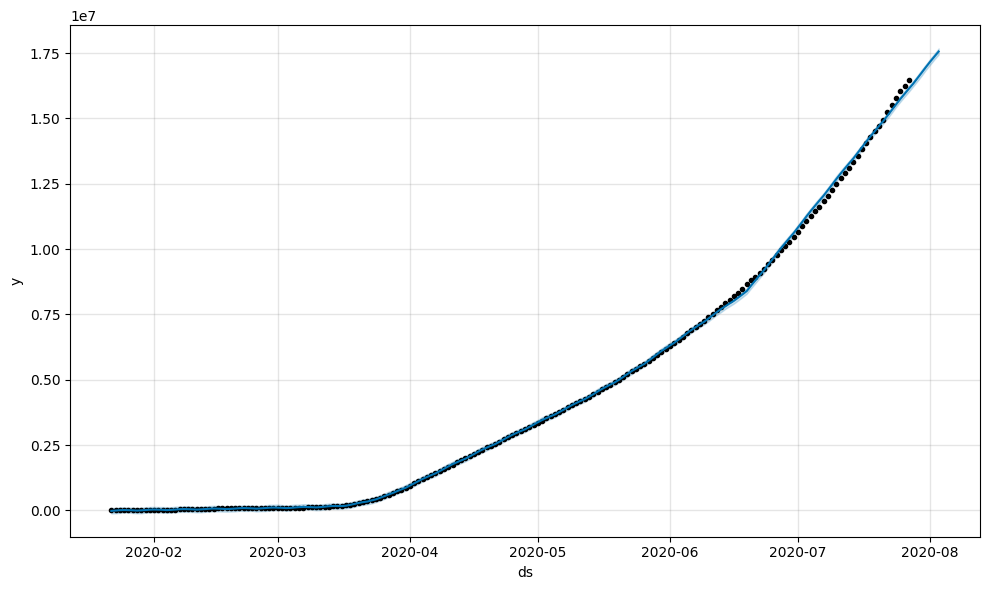

In [24]:
# Plot forecast using Prophet's plotting function
fig = model.plot(forecast)
fig.show()


**Explanation:**

*   model.plot(forecast) creates a plot showing historical data along with future predictions. The shaded region around the forecasted line represents the confidence interval.
*   This visualization allows you to see the trend of predicted COVID-19 cases alongside the actual historical data.



# Step 9: Visualize Trend Components
Prophet also allows us to break down the forecast into trend components (trend, weekly seasonality, yearly seasonality). This can be helpful to understand the underlying patterns in the data.

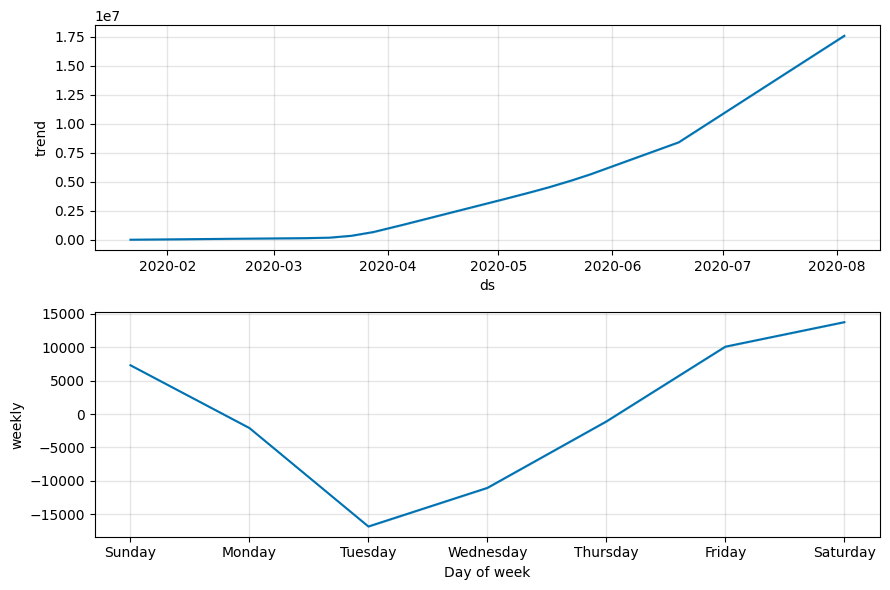

In [25]:
# Plot trend components
fig = model.plot_components(forecast)
fig.show()


**Explanation:**

*   model.plot_components(forecast) generates plots showing the trend and any detected seasonal patterns.
*   Each subplot helps identify patterns, like long-term growth and daily/weekly seasonality.



# Step 10: Visualization of Actual vs. Predicted Data
While Prophet's built-in plot shows the forecasted data, you may also want to compare actual and predicted values directly on the same plot.

In [ ]:
import plotly.graph_objects as go

# Plot actual vs. predicted
fig = go.Figure()

# Plot actual data
fig.add_trace(go.Scatter(x=prophet_data['ds'], y=prophet_data['y'], mode='lines', name='Actual'))

# Plot predicted data
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))

# Update layout for clarity
fig.update_layout(
    title="Actual vs. Predicted COVID-19 Cases",
    xaxis_title="Date",
    yaxis_title="Cases"
)
fig.show()


**Explanation:**

**Actual Data:** Plots the historical cases, showing what actually happened.

**Predicted Data:** Plots the forecasted cases based on the model's predictions.

By comparing actual and predicted values, you can visually assess how well the model fits the data. A close alignment indicates good model performance, while larger gaps may suggest areas where the model could be improved.



# Aditional Prophet Visualization

### **Weekly Seasonality Heatmap**

A weekly seasonality heatmap visualizes the variation in cases throughout the week, showing which days typically have higher or lower cases.

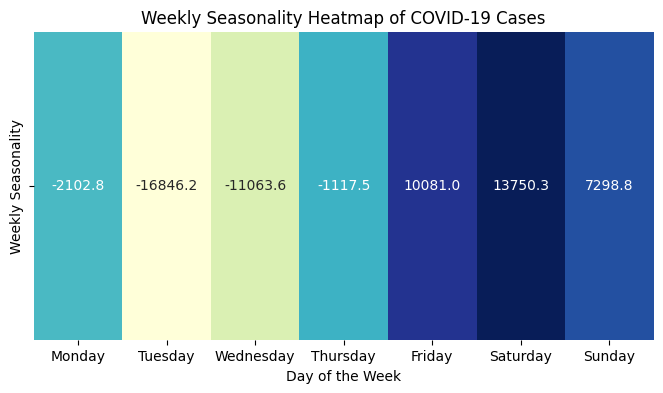

In [30]:
import seaborn as sns
import numpy as np

# Extract weekly seasonality data from forecast
forecast['day_of_week'] = forecast['ds'].dt.day_name()
weekly_seasonality = forecast.groupby('day_of_week')['weekly'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot heatmap of weekly seasonality
plt.figure(figsize=(8, 4))
sns.heatmap(np.array([weekly_seasonality]), annot=True, fmt=".1f", cmap="YlGnBu", cbar=False,
            xticklabels=weekly_seasonality.index, yticklabels=["Weekly Seasonality"])
plt.title("Weekly Seasonality Heatmap of COVID-19 Cases")
plt.xlabel("Day of the Week")
plt.show()


**Explanation:**

*   Heatmap Interpretation: Darker colors indicate higher case numbers, while lighter colors show lower values, highlighting weekly patterns.
*   Weekly Insights: This heatmap is useful for quickly identifying which days have spikes or lulls. For instance, weekends might have lower reported cases due to reduced testing/reporting.

*   This visualization is helpful for monitoring consistent patterns in data over each day of the week.






### **Anomaly Detection Using Forecast Errors**

By flagging points where forecast errors exceed a threshold, you can identify unusual events or anomalies (e.g., sudden surges in cases that the model couldn’t anticipate).

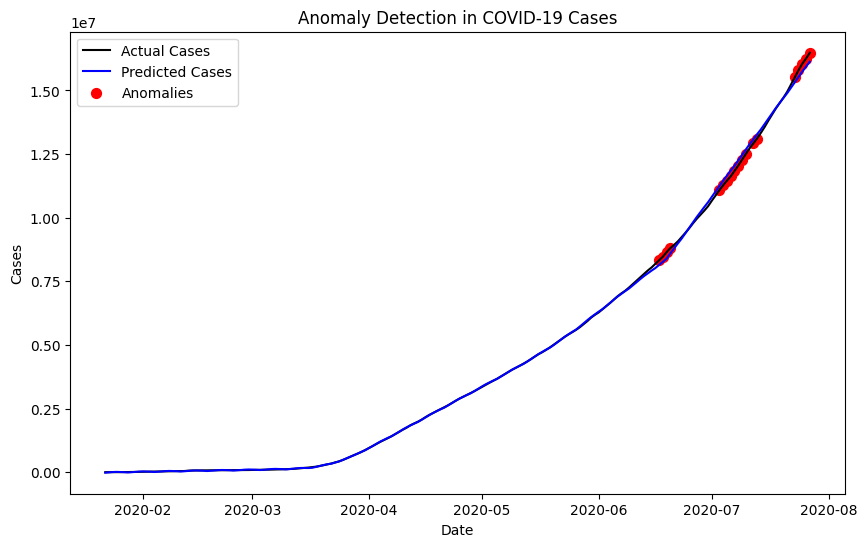

In [34]:
# Calculate the error column if it doesn't exist
if 'error' not in forecasted_data.columns:
    forecasted_data['error'] = forecasted_data['y'] - forecasted_data['yhat']  # Assuming 'y' is actual and 'yhat' is predicted

# Set an anomaly threshold (e.g., based on error distribution or standard deviation)
error_threshold = forecasted_data['error'].std() * 2  # Example: 2 standard deviations
forecasted_data['anomaly'] = forecasted_data['error'].apply(lambda x: 'Anomaly' if abs(x) > error_threshold else 'Normal')

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.plot(forecasted_data.index, forecasted_data['y'], label='Actual Cases', color='black')
plt.plot(forecasted_data.index, forecasted_data['yhat'], label='Predicted Cases', color='blue')
plt.scatter(forecasted_data[forecasted_data['anomaly'] == 'Anomaly'].index,
            forecasted_data[forecasted_data['anomaly'] == 'Anomaly']['y'],
            color='red', label='Anomalies', s=50)
plt.title("Anomaly Detection in COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

**Explanation:**

*   Anomalies: Points where the forecast error exceeds the threshold are flagged as anomalies. These are potential outliers or unusual events.
*   Anomalies: Points where the forecast error exceeds the threshold are flagged as anomalies. These are potential outliers or unusual events.

This visualization is valuable for quickly identifying events or periods where the forecast deviates significantly, which can highlight areas requiring special attention.



### **Prediction Confidence Interval Width Over Time**

Analyzing the width of the forecast’s confidence interval over time shows how prediction uncertainty changes, revealing when the model is more or less confident.

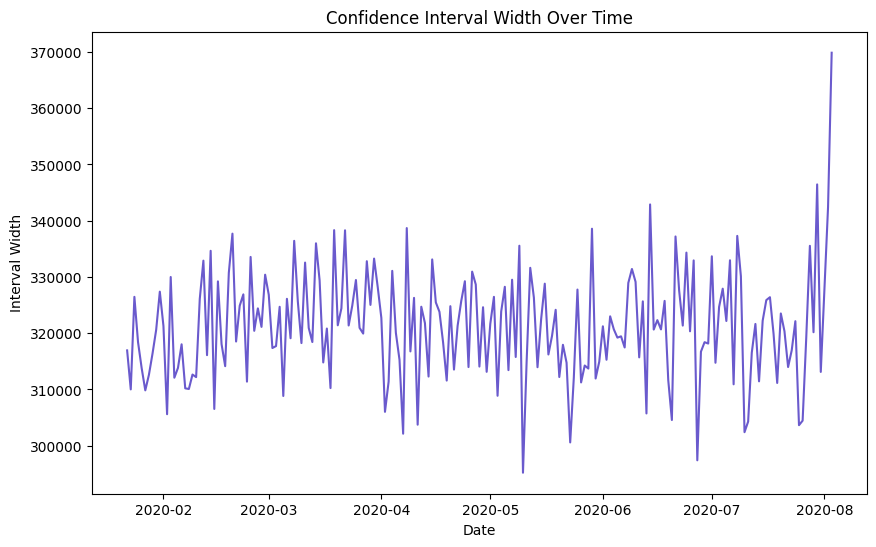

In [36]:
# Calculate interval width (yhat_upper - yhat_lower)
forecast['interval_width'] = forecast['yhat_upper'] - forecast['yhat_lower']

# Plot interval width over time
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['interval_width'], color='slateblue')
plt.title("Confidence Interval Width Over Time")
plt.xlabel("Date")
plt.ylabel("Interval Width")
plt.show()


**Explanation:**

*   Confidence Interval Width: A wider interval suggests higher uncertainty in predictions, which might indicate volatile or unpredictable data.
*   Trend Analysis: Changes in interval width over time reveal when forecasts become more or less reliable, such as during initial surges or irregular events.

This plot is helpful for understanding forecast reliability in different time periods and can aid in identifying when additional data or model tuning might be required.



# Conclusion:

This project successfully demonstrated the analysis and visualization of COVID-19 data, providing valuable insights into infection trends and making future predictions.

 *Here are the key takeaways:*

**Data Integration and Processing:**
Successfully combined multiple data sources using pandas

Cleaned and preprocessed the data for analysis

Created a unified dataset for both global and India-specific analysis

**Visualization Achievements:**
Created interactive visualizations using plotly

Displayed clear trends in infection rates and recovery patterns

Provided user-friendly interfaces for data exploration

Generated insightful geographical distributions of cases

**Prediction Model Implementation:**
Successfully implemented Facebook Prophet for time series forecasting
Generated weekly predictions with confidence intervals

Validated model accuracy against actual data

Provided actionable insights for future planning

**Key Findings:**
Identified patterns in infection spread
Analyzed recovery rates over time
Highlighted geographical hotspots
Predicted potential future trends
Limitations and Future

**Improvements:**
Model accuracy depends on data quality and completeness

External factors may affect prediction accuracy

Could be enhanced with additional data sources

Regular updates needed for continued relevance

**Applications:**
Helpful for healthcare resource planning
Useful for policy makers and administrators and valuable for public awareness

Assists in preparedness planning
This solution provides a comprehensive framework for COVID-19 data analysis and prediction, combining data science techniques with practical visualization tools to create an informative and useful application.